# Exploration of earthquake damage in Nepal

In this notebook the dataset provided by drivendata.org is scientifically explored. This dataset is provided as a part of the "Richter's Predictor: Modeling Earthquake Damage" competition that can be found under the following URL: https://www.drivendata.org/competitions/57/nepal-earthquake/

Our goal is to predict the damage grade on a score of three by analysing features of the building.

### Preliminaries

Importing the required dependencies.

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from src.features import build_features
# from src.data import make_dataset 
# commented out because: there seems to be an issue at the moment with the initial method from make_dataset
from src.models import train_model
from src.models import predict_model
from src.visualization import visualize

Loading the data.

In [3]:
train_df = pd.read_csv('../data/raw/train_values.csv')
target_df = pd.read_csv('../data/raw/train_labels.csv')

### General Properties

In [4]:
# Lets get a first overview about the dataset 
pd.options.display.max_columns = None
train_df.head(10)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
5,333020,8,558,6089,2,10,9,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
6,728451,9,475,12066,2,25,3,4,n,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
7,475515,20,323,12236,2,0,8,6,t,w,q,v,x,s,u,0,0,0,0,0,1,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
8,441126,0,757,7219,2,15,8,6,t,r,q,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
9,989500,26,886,994,1,0,13,4,t,i,n,v,j,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


## Feature Description
---
In the following the features of the dataset are described. This is done by evaluating the name, datatype and values of the feature to try to predict its usage. Deeper analysis for each feature is further described after the following list:

1. `building_id` which seems to be used to identify each unique building.
2. `geo_level_1_id`, `geo_level_2_id`, `geo_level_3_id` (unkown)
3. `count_floors_pre_eq` seems to be the number of floors the building had before the earthquake happend
4. `age` seems to be the age of the building before it was destroyed
5. `area_percentage` maybe the amount of buildings in an area 
6. `height_percentage` likely the height of the building before it was destroyed
7. `land_surface_condition` likely the condition the surface of the ground of the building had before the earthquake
8. `foundation_type` as the name suggests this seems to be the type of the foundation the building was built 
9. `roof_type`, `ground_floor_type`, `other_floor_type` as the name suggest this seems to be the type of the roof and floors the building had. It seems like only to types of floors where recorded
10. `position` (unkown)
11. `plan_configuration` (unkown)
12. `has_superstructure..` likely a one hot encoded feature that represents the type of the superstructure
13. `legal_ownership_status`
14. `count_families` seems to be the amount of families that lived in the building
15. `has_secondary_use..` seems to be a describe wether the building had another purpose than living in it


## 1. Analysis for `building_id` [to-do]
---
This feature describes each unique building that was recorded in the dataset. As the data shows, a total of 260.601 (about a quarter of a million) buildings where recorded in this dataset

In [5]:
train_df.building_id.count()

260601

## 2. Analysis for `count_floors_pre_eq` [to-do]
---

The "count_floors_pre_eq" feature represents the number of floors in the building before the earthquake, and its possible values are integers from 1 to 9. The data is showing that most buildings had a height of 2 to 3 floors. The maximum size of a building has 9 floors.

### Distribution

In [6]:
train_df.count_floors_pre_eq.value_counts()

count_floors_pre_eq
2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
8         1
9         1
Name: count, dtype: int64

### Relationship to target value

## 3. analysis for `age`
---
Summary of the analysis below:
1. The age feature is unbalanced with the age of the buildings going up to the maximum of age 995 years. However most buildings have an age below 40 years.
2. The exploration of the feature shows a trend regarding the damage grade type 1. The older the buildings are there is less damage of type 1. In fact for buildings that are older than 30 years damage of type 1 is no longer seen.


### Distribution

In [7]:
# lets see what the max value is
train_df.age.max()

995

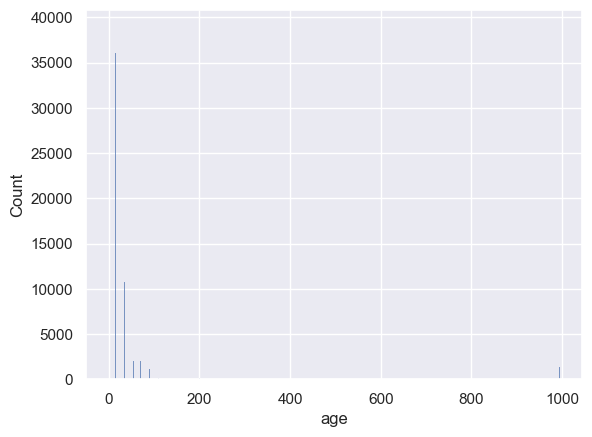

In [8]:
# Lets take a first look at the distribution
sns.set(style="darkgrid")
sns.histplot(train_df, x="age")
plt.show()

A first look at the distribution of the age value shows, that most buildings have an age below 200 years with a wide gap to some buildings that have about 900-1000 years. In the following we take a deeper look on the buildings below the age of 200 years as this part will propably be the most interesting for our prediction.

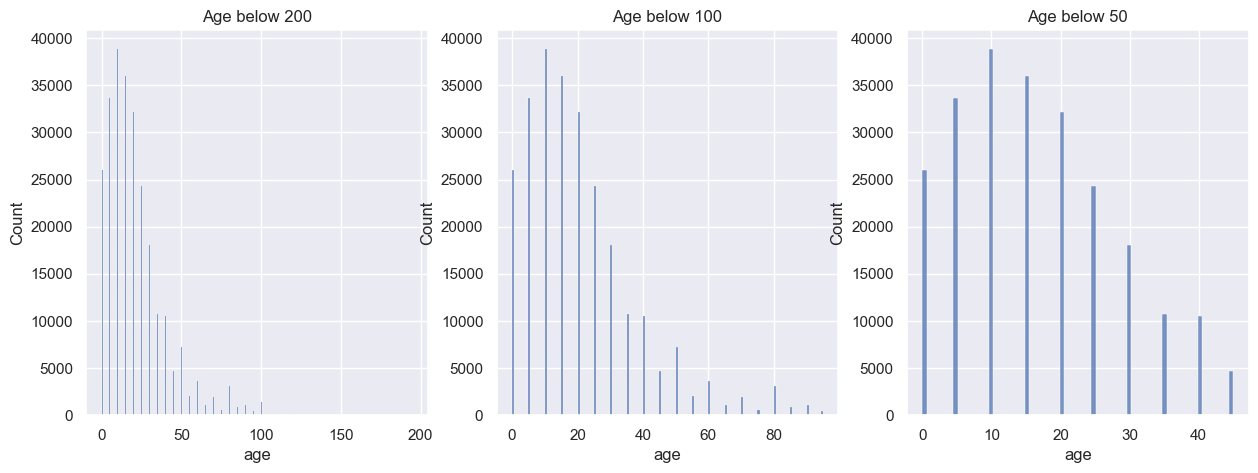

In [ ]:
# as the graph shows most buildings are below the age of 200
# lets remove outliers and create a new graph

# merge the two dataframes on building_id
merged_df = pd.merge(train_df, target_df, on='building_id')

threshold1 = 200
threshold2 = 100
threshold3 = 50

temp_df1 = merged_df[merged_df['age'] < threshold1]
temp_df2 = merged_df[merged_df['age'] < threshold2]
temp_df3 = merged_df[merged_df['age'] < threshold3]

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first graph in the first subplot
sns.histplot(temp_df1['age'], ax=axs[0])
axs[0].set_title(f'Age below {threshold1}')

# Plot the second graph in the second subplot
sns.histplot(temp_df2['age'], ax=axs[1])
axs[1].set_title(f'Age below {threshold2}')

# Plot the third graph in the third subplot
sns.histplot(temp_df3['age'], ax=axs[2])
axs[2].set_title(f'Age below {threshold3}')

plt.show()

The graphs above show, that most recorded buildings had an age below 40 years.

### Relation to the target value
We now know the age most of the buildings in the dataset have. In the following the relation to the damage grade is analysed.

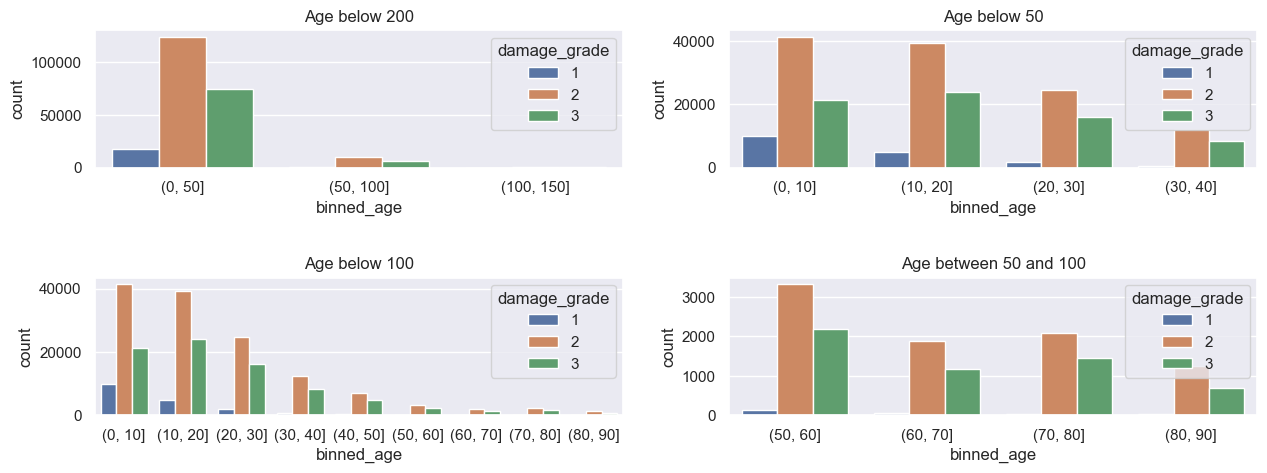

In [59]:
threshold1 = 200
threshold2 = 100
threshold3 = 50
threshold4 = 100

temp_df1 = merged_df.copy()
temp_df2 = merged_df.copy()
temp_df3 = merged_df.copy()
temp_df4 = merged_df.copy()

temp_df1["binned_age"] = pd.cut(merged_df['age'], bins=list(range(0,threshold1,50)))
temp_df2["binned_age"] = pd.cut(merged_df['age'], bins=list(range(0,threshold2,10)))
temp_df3["binned_age"] = pd.cut(merged_df['age'], bins=list(range(0,threshold3,10)))
temp_df4["binned_age"] = pd.cut(merged_df['age'], bins=list(range(50,threshold4,10)))

fig, axs = plt.subplots(2, 2, figsize=(15, 5))
# set the vertical spacing between the subplots
plt.subplots_adjust(hspace=0.8)

# Plot the first graph in the first subplot
sns.countplot(data=temp_df1, x='binned_age', hue='damage_grade', ax=axs[0][0])
axs[0][0].set_title(f'Age below {threshold1}')

# Plot the second graph in the second subplot
sns.countplot(data=temp_df2, x='binned_age', hue='damage_grade', ax=axs[1][0])
axs[1][0].set_title(f'Age below {threshold2}')

# Plot the third graph in the third subplot
sns.countplot(data=temp_df3, x='binned_age', hue='damage_grade', ax=axs[0][1])
axs[0][1].set_title(f'Age below {threshold3}')

# Plot the forth graph in the forth subplot
sns.countplot(data=temp_df4, x='binned_age', hue='damage_grade', ax=axs[1][1])
axs[1][1].set_title(f'Age between 50 and {threshold4}')

plt.show()

The graphs allow us to take a deeper look into the relation of the buildings age towards the damage grade it received from the earthquake. Interestingly there seems to be a trend with buildings that get older having a higher damage grade. In fact buildings that have an age above 30 years no longer have a damage grade of type 1 reported. (with the expection of some outliers at the age of 50 - 60 years).

## Analysis of target value
---

In [10]:
target_df.head(10)

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
5,333020,2
6,728451,3
7,475515,1
8,441126,2
9,989500,1


### Analysis of missing and default values, as well as finding uninformative columns

### Analysis of relationships between features

### Conclusions